In [89]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns


In [90]:
x_ds, y_ds = load_iris(return_X_y=True)
x_ds

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [91]:
y_ds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [92]:
w1 = nn.Linear(4, 12)
w2 = nn.Linear(12, 2)
nn.init.xavier_normal_(w1.weight)
nn.init.xavier_normal_(w2.weight)


Parameter containing:
tensor([[-0.3779, -0.0932,  0.2860, -0.7100, -0.3964, -0.0292,  0.1827, -0.6690,
          0.5441, -0.1850, -0.4497,  0.3261],
        [-0.6867, -0.9055,  0.0484,  0.4812,  0.5649,  0.2791, -0.0164, -0.0031,
          0.0010,  0.5869,  0.4108, -0.5030]], requires_grad=True)

In [93]:
def forward(x):
    x = F.relu(w1(x))
    x = F.relu(w2(x))
    return x

In [96]:
def get_distance(x1, x2):
    return F.pairwise_distance(x1, x2)

get_distance(x_ds[0].unsqueeze(dim=0), x_ds[1].unsqueeze(dim=0))

tensor([0.5385])

In [95]:
x_ds = torch.Tensor(x_ds)
y_ds = torch.Tensor(y_ds)

In [97]:
y_hat = forward(y_ds)
y_hat

RuntimeError: size mismatch, m1: [1 x 150], m2: [4 x 12] at /Users/administrator/nightlies/pytorch-1.0.0/wheel_build_dirs/conda_3.6/conda/conda-bld/pytorch_1544137972173/work/aten/src/TH/generic/THTensorMath.cpp:940

In [88]:
df = pd.DataFrame({'x': y_hat[:,0].detach().numpy(), 'y': y_hat[:,1].detach().numpy(), 'target': y})
df

TypeError: len() of a 0-d tensor

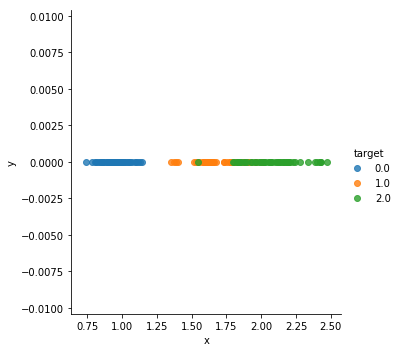

In [65]:
sns.lmplot(x="x", y="y", hue='target', fit_reg=False, data=df)

In [98]:
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        
        self.w1 = nn.Linear(4, 12)
        self.w2 = nn.Linear(12, 2)
        nn.init.xavier_normal_(self.w1.weight)
        nn.init.xavier_normal_(self.w2.weight)


    def forward(self, x):
        x = F.relu(w1(x))
        x = F.relu(w2(x))
        return x
m = Model()

In [125]:
class ClusteringDistanceLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, logits, targets):
        loss = 0.0
        for i, (x, y) in enumerate(zip(logits, targets)):
            x_loss = 0.0
            # calculate distance to all others
            for j, (x2, y2) in enumerate(zip(logits, targets)):
                if i == j:
                    continue
                    
                d = get_distance(x.unsqueeze(dim=0), x2.unsqueeze(dim=0))
                if y == y2:
                    x_loss += d
                else:
                    x_loss += 1/d
                print(x_loss)
            loss += x_loss
        return loss
            
criterion = ClusteringDistanceLoss()

In [126]:
optimizer = optimizer = torch.optim.Adam(m.parameters(),
                        lr=0.1)

In [127]:
def step(x, y):
    optimizer.zero_grad()
    
    coords_pred = m.forward(x)
    loss = criterion(coords_pred, y)
    
    loss.backward()
    optimizer.step(loss)
    return loss

In [128]:
epochs = 1

for e in range(epochs):
    iterator = iter(zip(x_ds, y_ds))
    
    while True:
        try:
            # get the next item
            x_batch = None
            for i in range(4):
                x, y = next(iterator)
                x = x.unsqueeze(dim=0)
                y = y.unsqueeze(dim=0)
                if x_batch is None:
                    x_batch = x
                    y_batch = y
                else:
                    x_batch = torch.cat((x_batch, x))
                    y_batch = torch.cat((y_batch, y))

            loss = step(x_batch, y_batch)
            print(loss)
            # do something with element
        except StopIteration:
            # if StopIteration is raised, break from loop
            break
    
        
        

tensor([0.0161], grad_fn=<AddBackward0>)
tensor([0.0377], grad_fn=<AddBackward0>)
tensor([0.0571], grad_fn=<AddBackward0>)
tensor([0.0161], grad_fn=<AddBackward0>)
tensor([0.0216], grad_fn=<AddBackward0>)
tensor([0.0571], grad_fn=<AddBackward0>)
tensor([0.0216], grad_fn=<AddBackward0>)
tensor([0.0271], grad_fn=<AddBackward0>)
tensor([0.0681], grad_fn=<AddBackward0>)
tensor([0.0194], grad_fn=<AddBackward0>)
tensor([0.0549], grad_fn=<AddBackward0>)
tensor([0.0959], grad_fn=<AddBackward0>)


TypeError: 'Tensor' object is not callable

In [129]:
a = torch.Tensor([1, 2, 3])
a = torch.cat((a.unsqueeze(dim=0), torch.Tensor([[1, 2, 34]])))
a

tensor([[ 1.,  2.,  3.],
        [ 1.,  2., 34.]])